In [1]:
import pandas as pd 
df = pd.read_csv("archive/Crop_recommendation.csv")

In [2]:
df.head(5)

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [3]:
df["phosphorus"]

0       42
1       58
2       55
3       35
4       42
        ..
2195    34
2196    15
2197    33
2198    32
2199    18
Name: phosphorus, Length: 2200, dtype: int64

In [4]:
col = df.columns

In [5]:
df.drop(columns = [col[-1] , col[-2]] , inplace = True)

In [6]:
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [7]:
from sklearn.compose import ColumnTransformer

In [8]:
num_col = df.select_dtypes(exclude=object).columns.tolist()

In [9]:
for i in num_col:
    print(i,": ",df[i].isna().sum())

Nitrogen :  0
phosphorus :  0
potassium :  0
temperature :  0
humidity :  0
ph :  0
rainfall :  0


In [10]:
num_col

['Nitrogen',
 'phosphorus',
 'potassium',
 'temperature',
 'humidity',
 'ph',
 'rainfall']

In [11]:
target = df["label"].unique().tolist()

In [28]:
from ydata_profiling import ProfileReport

In [29]:
report = ProfileReport(df)
report.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'rice'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
df.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
label_dict = {value:key for key,value in enumerate(target)}
label_dict

{'rice': 0,
 'maize': 1,
 'chickpea': 2,
 'kidneybeans': 3,
 'pigeonpeas': 4,
 'mothbeans': 5,
 'mungbean': 6,
 'blackgram': 7,
 'lentil': 8,
 'pomegranate': 9,
 'banana': 10,
 'mango': 11,
 'grapes': 12,
 'watermelon': 13,
 'muskmelon': 14,
 'apple': 15,
 'orange': 16,
 'papaya': 17,
 'coconut': 18,
 'cotton': 19,
 'jute': 20,
 'coffee': 21}

In [14]:
df["label"].replace(label_dict, inplace = True)

In [33]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [34]:
y

0        0
1        0
2        0
3        0
4        0
        ..
2195    21
2196    21
2197    21
2198    21
2199    21
Name: label, Length: 2200, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [34]:
# X_train[0]

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [36]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9931818181818182


In [39]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

In [40]:
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score)

Cross-validation scores: [0.98863636 1.         0.99431818 0.99715909 0.99431818]
Mean cross-validation score: 0.9948863636363636


In [43]:
import pickle 
with open('crop_prediction.pkl', 'wb') as file:
    pickle.dump((scale, rf_classifier), file)

In [44]:
col

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [45]:
df.columns

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Assuming X_train and y_train are your training data
rf_classifier = RandomForestClassifier(random_state=0)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.98863636 1.         0.99431818 0.99715909 0.99431818]
Mean cross-validation score: 0.9948863636363636


In [47]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        23
           5       1.00      0.96      0.98        24
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        20
           8       0.92      1.00      0.96        11
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        14
          17       1.00    

In [50]:
df["label"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int64)

In [1]:
from sklearn.metrics.pairwise import cosine_similarity

In [1]:
data = {'rice': 0,
 'maize': 1,
 'chickpea': 2,
 'kidneybeans': 3,
 'pigeonpeas': 4,
 'mothbeans': 5,
 'mungbean': 6,
 'blackgram': 7,
 'lentil': 8,
 'pomegranate': 9,
 'banana': 10,
 'mango': 11,
 'grapes': 12,
 'watermelon': 13,
 'muskmelon': 14,
 'apple': 15,
 'orange': 16,
 'papaya': 17,
 'coconut': 18,
 'cotton': 19,
 'jute': 20,
 'coffee': 21}


In [2]:
crop_list = [i for i in data]

In [3]:
crop_list

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

In [15]:
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
box_plot_nutrients = df.columns[:3]
box_plot_nutrients

Index(['Nitrogen', 'phosphorus', 'potassium'], dtype='object')

# EDA of Original Dataset

### - Soil Parameters

Text(0, 0.5, 'Nitrogen')

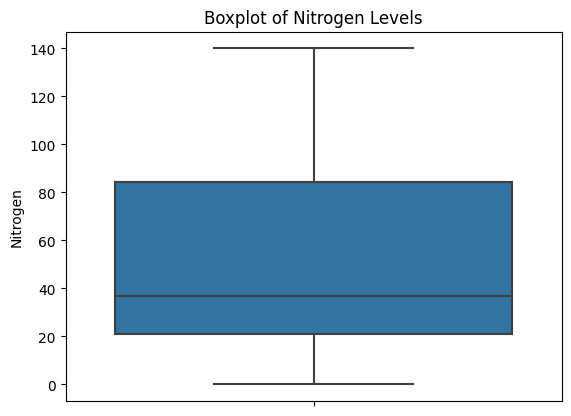

In [18]:
sns.boxplot(y=df[box_plot_nutrients[0]])
plt.title(f'Boxplot of {box_plot_nutrients[0]} Levels')
plt.ylabel(box_plot_nutrients[0])

Text(0, 0.5, 'phosphorus')

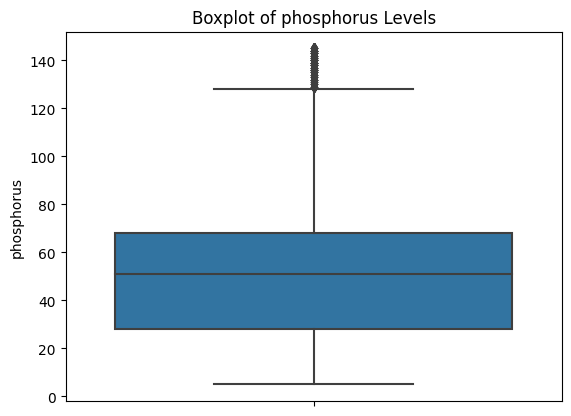

In [19]:
sns.boxplot(y=df[box_plot_nutrients[1]])
plt.title(f'Boxplot of {box_plot_nutrients[1]} Levels')
plt.ylabel(box_plot_nutrients[1])

Text(0, 0.5, 'potassium')

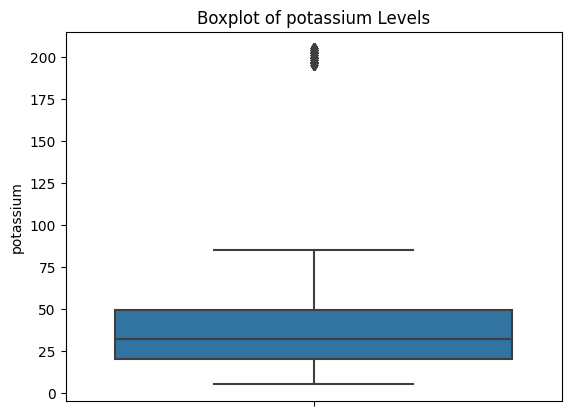

In [20]:
sns.boxplot(y=df[box_plot_nutrients[2]])
plt.title(f'Boxplot of {box_plot_nutrients[2]} Levels')
plt.ylabel(box_plot_nutrients[2])

# Before EDA

In [21]:
skew_val  = df.skew(axis=0, skipna=True)
skew_val

Nitrogen       0.509721
phosphorus     1.010773
potassium      2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
label          0.000000
dtype: float64

In [22]:
len(df)

2200

In [23]:
df_filter = df.drop(df[df['potassium'] > 180].index)
df_filter

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21


Text(0.5, 1.0, 'Boxplot of Potassium Levels')

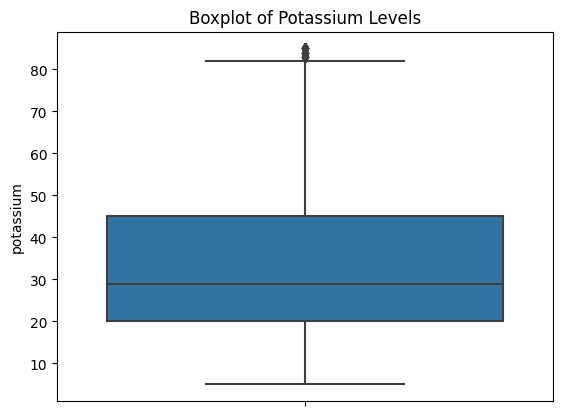

In [24]:
sns.boxplot(y=df_filter["potassium"])
plt.title(f'Boxplot of Potassium Levels')

In [25]:
df_filter = df.drop(df[df['phosphorus'] > 125].index)
df_filter

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21


Text(0.5, 1.0, 'Boxplot of Potassium Levels')

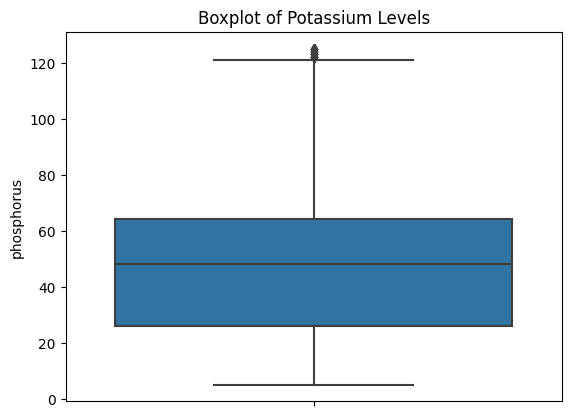

In [26]:
sns.boxplot(y=df_filter["phosphorus"])
plt.title(f'Boxplot of Potassium Levels')

In [27]:
len(df_filter)

2047

In [28]:
condition1 = df['phosphorus'] <= 125
condition2 = df['potassium'] <= 180

combined_condition = condition1 & condition2

df_new = df_filter[combined_condition]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27672\696210115.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_filter[combined_condition]


In [29]:
df_new.skew()

Nitrogen       0.381564
phosphorus    -0.063454
potassium      0.995980
temperature    0.236024
humidity      -0.969822
ph             0.154554
rainfall       0.894222
label          0.120617
dtype: float64

In [44]:
def log_transform(X):
    return np.log(X)

In [45]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

In [46]:
transformer = FunctionTransformer(log_transform)
transformer_ne = FunctionTransformer(log_transform_nv)
df_new["potassium"] = transformer.transform(df_new["potassium"])
df_new["rainfall"] = transformer.transform(df_new["rainfall"])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27672\2018997500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["potassium"] = transformer.transform(df_new["potassium"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27672\2018997500.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["rainfall"] = transformer.transform(df_new["rainfall"])


In [47]:
df_new.skew()

Nitrogen       0.381564
phosphorus    -0.063454
potassium     -0.227208
temperature    0.236024
humidity      -0.969822
ph             0.154554
rainfall      -0.320300
label          0.120617
dtype: float64

In [48]:
X_new = df_new.iloc[:,:-1]
y_new = df_new.iloc[:,-1]

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [109]:
# from sklearn.preprocessing import StandardScaler
# scale_new = StandardScaler()
# X_train = scale_new.fit_transform(X_train)
# X_test = scale_new.transform(X_test)

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [55]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9925


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Assuming X_train and y_train are your training data
rf_classifier = RandomForestClassifier(random_state=0)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.996875 0.996875 0.996875 0.996875 0.990625]
Mean cross-validation score: 0.9956249999999999


In [56]:
import pickle 
with open('crop_prediction_updated.pkl', 'wb') as file:
    pickle.dump((rf_classifier), file)